In [25]:
%pylab nbagg
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Reminders for this section:
- when making lambda functions, DON'T hardcode constants! always use variables and then test the function
- we will use scipy
- close the figures per usual

## we start by plotting  $ f(x) = ax^3 + bx^2 + cx + d $  and some noisy data

In [27]:
a = -1.; b = 1.; c = 1.; d = 1.;
f = lambda x: a*x**3 + b*x**2 + c*x + d

In [28]:
f(1), f(2) #test, to see if it works

(2.0, -1.0)

In [29]:
n = 20
x = linspace(-2., 2., n)

In [30]:
## need to make noisy data!!
# we only need to noise the y array tho

y_eps = 1.3; x_eps = 0.;
d_err = y_eps*(rand(len(x))-0.5)
y_noise = f(x)+d_err
x_noise = x + x_eps*d_err

<IPython.core.display.Javascript object>


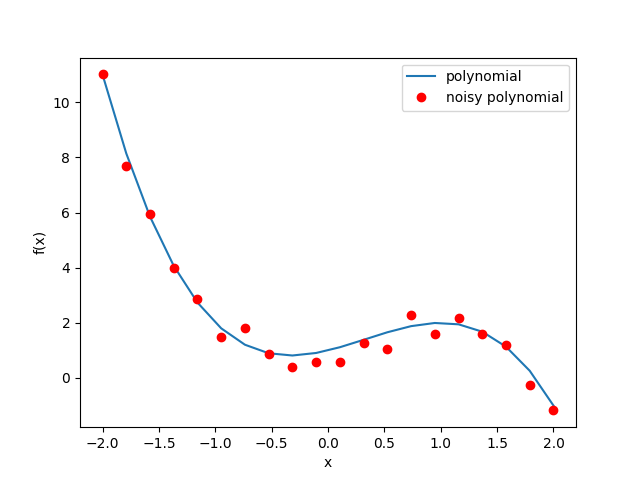

In [49]:
figure(1)
plot(x,f(x),label='polynomial')
plot(x+x_eps*d_err,f(x)+d_err,'ro',label='noisy polynomial')
legend(loc=0)
xlabel('x')
ylabel('f(x)')

## now we interpolate using scipy

In [32]:
from scipy import interpolate as inter

In [38]:
# ?inter.interp1d # ------ interpolate a 1D function. ie; x, f(x).

In [39]:
f_int1=inter.interp1d(x_noise,y_noise,kind='linear')
f_int2=inter.interp1d(x_noise,y_noise,kind='cubic')

In [42]:
# ?inter.splrep # ------ Find the B-spline representation of 1-D curve.

In [44]:
s=0.8
f_spl = inter.splrep(x_noise,y_noise, s=s) # vary s, smoothness

In [47]:
# ?inter.CubicSpline # ------ Interpolate data with a piecewise cubic polynomial which is twice 
                     #continuously differentiable

In [48]:
f_int3=inter.CubicSpline(x_noise,y_noise)

## now we plot the interpolations

<IPython.core.display.Javascript object>


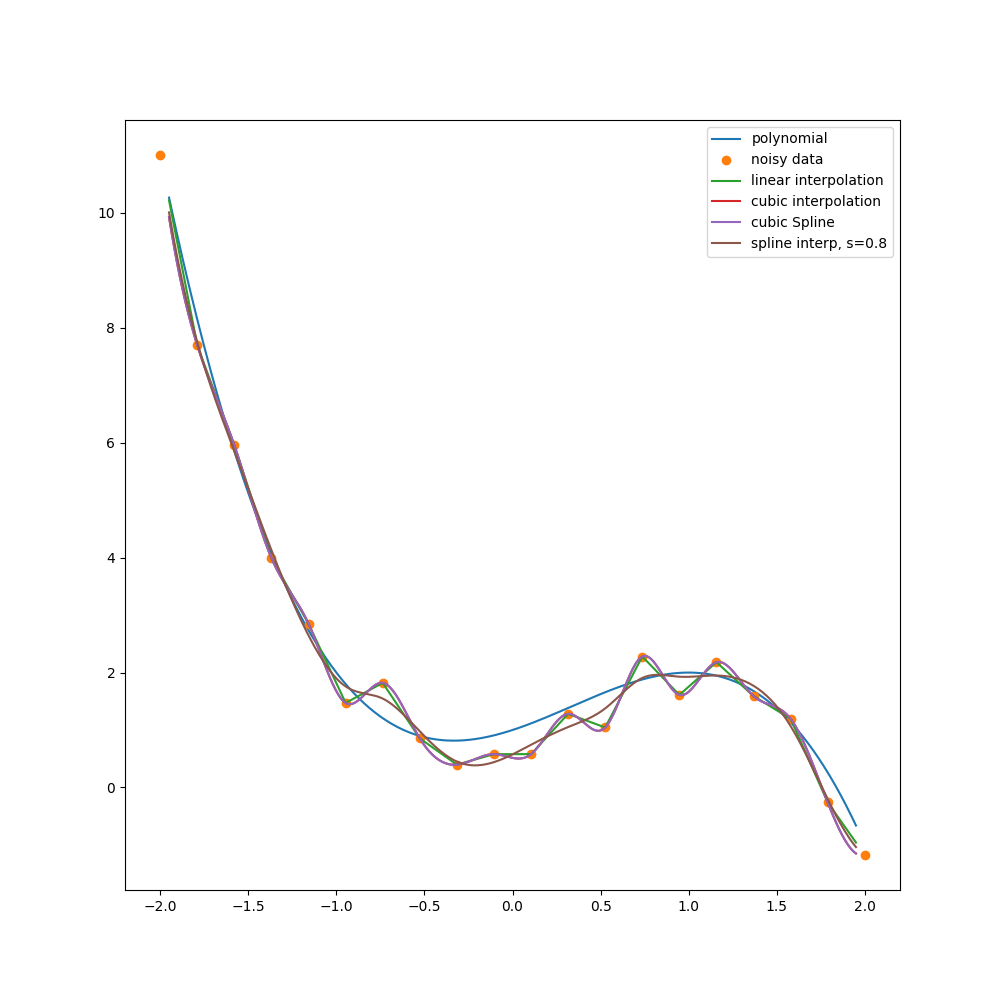

In [58]:
figure(2,figsize = (10,10) )

xgrid=linspace(-1.95,1.95,500)

plot(xgrid,f(xgrid),label='polynomial') # call original function
plot(x,y_noise,'o',label='noisy data') #call noisy data
plot(xgrid,f_int1(xgrid),label='linear interpolation') #call interpolations w/ new xgrid linspace
plot(xgrid,f_int2(xgrid),label='cubic interpolation')
plot(xgrid,f_int3(xgrid),label='cubic Spline')
plot(xgrid,inter.splev(xgrid, f_spl, der=0),label='spline interp, s='+str(s))
legend(loc=0)